In [2]:
import pandas as pd
import json
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import linear_model
from datetime import datetime
from scipy.stats import skew
from mpl_toolkits.mplot3d import Axes3D
selecteddatapath = '/home/titli/Documents/Springboard1/Machinelearning/cleaned_data.csv'
pd.options.display.max_columns = 200

In [4]:
cleaned_data= pd.read_csv(selecteddatapath, header=0, index_col=0)
dataset1=cleaned_data[cleaned_data['Faker']==1]
dataset0=cleaned_data[cleaned_data['Faker']==0]

cleaned_data.describe()

,average_stars,review_count,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,cool,fans,funny,rev_length,rev_stars,rev_use,friend_count,friend_label,rev_count_label,buss_star,buss_review,alpha_length,length_lemmatize,NN,NNP,NNS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WRB,Faker
count,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.688800,8.280000,0.170000,0.0,0.170000,0.080000,0.0,0.035000,0.150000,0.080000,0.250000,0.385000,0.630000,0.750000,534.855000,3.645000,0.705000,13.735000,0.195000,0.855000,3.762500,347.730000,98.620000,47.720000,19.630000,0.020000,3.935000,0.090000,0.180000,5.520000,2.420000,8.150000,0.160000,0.050000,0.53000,5.015000,7.220000,1.735000,1.945000,2.680000,2.035000,0.385000,0.360000,0.525000,0.500000
std,1.253741,16.662225,0.913935,0.0,0.913935,0.452353,0.0,0.306995,0.787784,0.752617,0.944436,1.558499,5.567593,4.385621,536.602446,1.662164,1.424119,58.262832,0.685071,0.660421,0.896584,769.966779,101.510975,46.028302,18.610612,0.172478,4.260462,0.303911,0.537629,8.171503,2.887088,9.122147,0.442015,0.218492,1.10235,5.965123,8.557321,2.462742,2.429297,3.990894,3.295158,0.965107,0.820834,1.036701,0.501255
min,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,216.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.500000,26.250000,39.000000,20.000000,8.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.00000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.915000,3.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,389.000000,5.000000,0.000000,0.000000,0.000000,1.000000,4.000000,90.500000,72.500000,34.500000,14.000000,0.000000,3.000000,0.000000,0.000000,3.000000,1.000000,6.000000,0.000000,0.000000,0.00000,4.000000,5.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.500000
75%,5.000000,7.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,620.250000,5.000000,1.000000,0.000000,0.000000,1.000000,4.500000,232.250000,113.000000,55.250000,22.250000,0.000000,5.000000,0.000000,0.000000,6.000000,3.000000,10.000000,0.000000,0.000000,1.00000,6.000000,9.000000,2.000000,3.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,154.000000,8.000000,0.0,8.000000,4.000000,0.0,4.000000,9.000000,10.000000,7.000000,15.000000,77.000000,56.000000,4950.000000,5.000000,10.000000,428.000000,3.000000,4.000000,5.000000,5950.000000,926.000000,407.000000,150.000000,2.000000,32.000000,2.000000,4.000000,77.000000,15.000000,93.000000,3.000000,1.000000,8.00000,52.000000,47.000000,15.000000,13.000000,43.000000,38.000000,9.000000,4.000000,8.000000,1.000000


### Test-train split

In [5]:
feature_columns = 'average_stars 	review_count 	compliment_cool 	compliment_cute 	\
compliment_funny 	compliment_hot 	compliment_list 	compliment_more 	\
compliment_note 	compliment_photos 	compliment_plain 	cool 	fans 	\
funny 	rev_length 	rev_stars 	rev_use 	friend_count 	friend_label 	\
rev_count_label 	buss_star 	buss_review 	alpha_length 	length_lemmatize \
NN 	NNP 	NNS 	PDT 	POS 	PRP 	PRP$ 	RB 	RBR 	RBS 	RP 	VB 	\
VBD 	VBG 	VBN 	VBP 	VBZ 	WDT 	WP 	WRB'.split()

X = (cleaned_data[feature_columns])
X.replace(to_replace= 'NaN', value=np.nan, inplace=True)
X.fillna(value= 0, inplace=True) 

y= cleaned_data['Faker']
X_train=X.values[:160,:]
X_test=X.values[160:,]
y_train =y.values[:160,]
y_test =y.values[160:,]
columns=['True Pos', 'False Pos', 'False Neg', 'True Neg', 'Accur', 'Recall', 'Prec', 'F1']
machine_learning=pd.DataFrame(columns=columns)
dtype = [('True Pos','int32'), ('False Pos','int32'), ('False Neg','float32'), ('True Neg','float32'),\
        ('Accur', 'float32'), ('Recall', 'float32'), ('Prec', 'float32'), ('F1', 'float32')]
#values = np.zeros(10, dtype=dtype)
#index = ['Row'+str(i) for i in range(1, len(values)+1)]
#machine_learning = pd.DataFrame(values, index=index)

/home/titli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/home/titli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


1 PRP$ 0.09078578784594421
2 average_stars 0.0775395134909361
3 NN 0.06063926493135878
4 buss_review 0.05987820737856189
5 VB 0.05971976446595563
6 review_count 0.05706733732029779
7 rev_length 0.05095355081116822
8 VBD 0.05039938581656459
9 VBZ 0.04727061028771006
10 RB 0.039802843884653445
11 length_lemmatize 0.03722743532116322
12 PRP 0.037204700636598254
13 rev_stars 0.03366753528498414
14 NNS 0.03223270609026408
15 alpha_length 0.03171755626693837
16 VBG 0.03158601665967478
17 WRB 0.031040453129827304
18 VBN 0.01970257065924371
19 buss_star 0.019024365506568573
20 friend_count 0.016763321124830893
21 RP 0.01572484918826479
22 rev_use 0.015040555502168356
23 VBP 0.01351162025111022
24 rev_count_label 0.009282615290685692
25 compliment_funny 0.009172669308572233
26 cool 0.008406717354263342
27 friend_label 0.007913955599181727
28 WDT 0.0070361235106931016
29 POS 0.005554062762930463
30 funny 0.005427997432628426
31 compliment_plain 0.0051176937910191135
32 fans 0.0034094091042426644

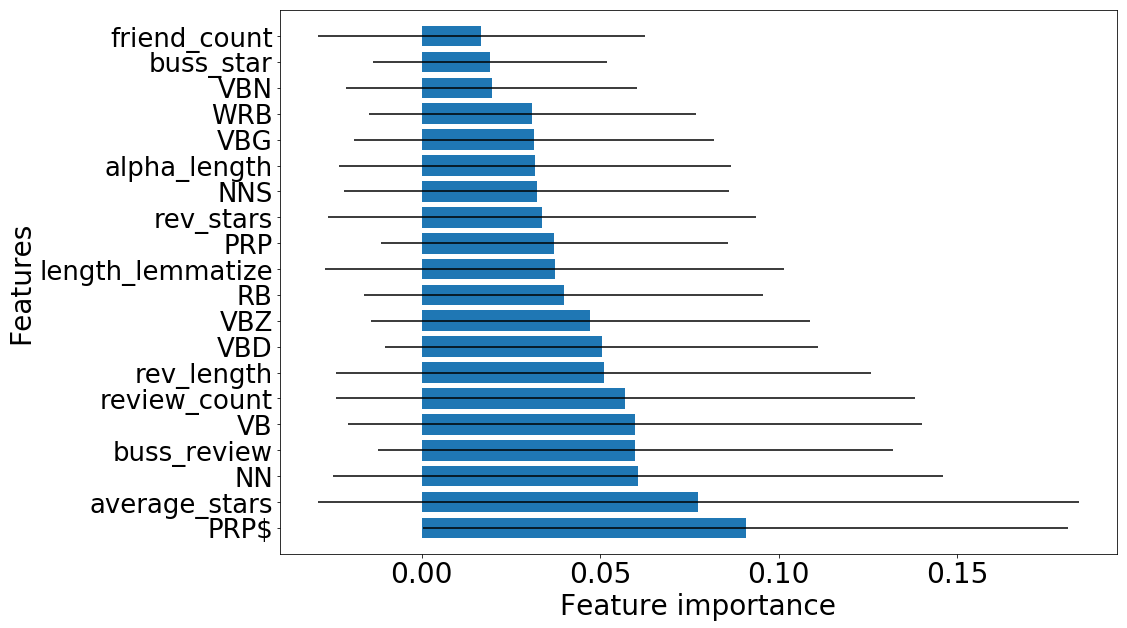

In [6]:
from sklearn.ensemble import RandomForestClassifier
RFcw = RandomForestClassifier(random_state=40, n_estimators = 50, min_samples_leaf=5, class_weight="balanced")
RFcw.fit(X_train, y_train)
# Feature importance
#forest = RFcw.best_estimator_.steps[-1][1] 
imps = RFcw.feature_importances_

# Std dev due to all trees in the forest
std = np.std([tree.feature_importances_ for tree in RFcw.estimators_], axis=0)
# Index that sorts the features with most important first
indices = np.argsort(imps)[::-1]
for f in range(len(feature_columns)):
    print(f+1, feature_columns[indices[f]], imps[indices[f]])
selected_feature = []
for i in range(20):
    selected_feature.append(feature_columns[indices[i]])
plt.figure(figsize=(15,10))
#plt.title("Feature importances: top 50", size = 24)
nf = 20 # how many top features you want to visualize?
plt.barh(range(nf), imps[indices[:nf]], xerr=std[indices[:nf]], align="center")
plt.yticks(range(nf), selected_feature, size=26)
plt.ylim([-1, nf])
plt.xlabel("Feature importance", fontsize=28)
plt.ylabel("Features", fontsize=28)
plt.xticks(size=28)
#plt.tick_params(direction='out', length=6, width=2, colors='k', labelsize=22)
plt.show()


Text(0.5,1,'Inverse of regularization strength in logistic regression ')

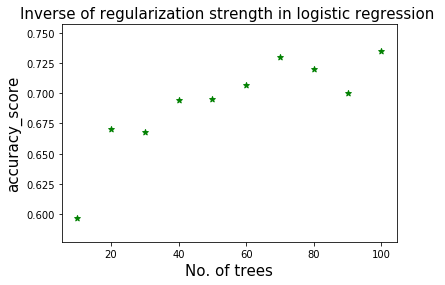

In [8]:
from sklearn.metrics import average_precision_score
PRAUC = []
for trees in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    RFcwiter = RandomForestClassifier(random_state=40, n_estimators = trees, min_samples_leaf=5, class_weight="balanced")
    RFcwiter.fit(X_train, y_train)
    PRAUC.append(average_precision_score(y_test, RFcwiter.predict_proba(X_test)[:,1]))
plt.scatter(x= [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], y=PRAUC, marker='*', color='green')
plt.xlabel('No. of trees', fontsize=15)
plt.ylabel('accuracy_score',fontsize=15)
plt.title('Inverse of regularization strength in logistic regression ',fontsize=15)

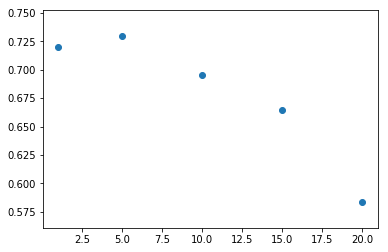

In [117]:
from sklearn.metrics import average_precision_score
PRAUC1 = []
for leaf in [1,5,10,15,20]:
    RFcwiter = RandomForestClassifier(random_state=40, n_estimators = 70, min_samples_leaf=leaf, class_weight="balanced")
    RFcwiter.fit(X_train, y_train)
    PRAUC1.append(average_precision_score(y_test, RFcwiter.predict_proba(X_test)[:,1]))
plt.scatter(x= [1,5,10,15,20], y=PRAUC1)

### New test-train split based on selected features

In [130]:
X_new = (cleaned_data[selected_feature])
X_new_train=X_new.values[:160,:]
X_new_test=X_new.values[160:,]

In [131]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=40, n_estimators=70, min_samples_leaf=5, class_weight="balanced").fit(X_new_train, y_train)
y_pred =clf.predict(X_new_test)
y_pred_train =clf.predict(X_new_train)

In [126]:
def confusion(predictions, actuals):
    actuals=actuals.values[:,0] if isinstance(actuals,pd.DataFrame) else actuals
    
    true_pos= (predictions==1) & (actuals==1)
    true_pos.sum()
    true_neg= (predictions==0) & (actuals==0)
    true_neg.sum()
    false_pos= (predictions==1) & (actuals==0)
    false_pos.sum()
    false_neg= (predictions==0) & (actuals==1)
    false_neg.sum()
    
    prec=true_pos.sum()/(true_pos.sum()+false_pos.sum())
    accur=(true_pos.sum()+true_neg.sum())/(true_pos.sum()+false_pos.sum()+ \
                                           true_neg.sum()+ false_neg.sum())
    recall = true_pos.sum()/(true_pos.sum()+false_neg.sum())
    F1=2*(prec*recall/(prec+recall))
 
    return(true_pos.sum(), false_pos.sum(),false_neg.sum(),true_neg.sum(), accur,recall, prec, F1)

In [132]:
np.array((confusion(y_pred_train, y_train.reshape((1, 160)))))

array([75.        ,  4.        ,  5.        , 76.        ,  0.94375   ,
        0.9375    ,  0.94936709,  0.94339623])

In [133]:
confusion(y_pred, y_test.reshape((1, 40)))

(15, 6, 5, 14, 0.725, 0.75, 0.7142857142857143, 0.7317073170731706)